# 00 — Download & Preprocess Jena Climate Data

Downloads the Jena Climate dataset and resamples it to **daily mean temperature**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

## Download the raw data

The Jena Climate dataset contains 10-minute interval weather measurements from the Max Planck Institute for Biogeochemistry in Jena, Germany.

In [2]:
url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"

print("Downloading Jena Climate dataset...")
df_raw = pd.read_csv(url)
print(f"Raw data shape: {df_raw.shape}")
df_raw.head()

Raw data shape: (420551, 15)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


## Resample to daily mean temperature

In [3]:
df_raw["Date Time"] = pd.to_datetime(df_raw["Date Time"], format="%d.%m.%Y %H:%M:%S")
df_raw = df_raw.set_index("Date Time")

# Resample to daily mean temperature (column: "T (degC)")
df_daily = df_raw[["T (degC)"]].resample("D").mean()
df_daily.columns = ["temperature"]
df_daily = df_daily.dropna()

print(f"Daily data shape: {df_daily.shape}")
print(f"Date range: {df_daily.index.min()} to {df_daily.index.max()}")
df_daily.head()

Daily data shape: (2921, 1)
Date range: 2009-01-01 00:00:00 to 2017-01-01 00:00:00


,temperature
Date Time,
2009-01-01,-6.810629
2009-01-02,-3.728194
2009-01-03,-5.271736
2009-01-04,-1.375208
2009-01-05,-4.867153


## Save to CSV

In [4]:
output_path = Path("../data/jena_daily_temp.csv")
output_path.parent.mkdir(parents=True, exist_ok=True)

df_daily.to_csv(output_path)
print(f"Saved to {output_path} ({output_path.stat().st_size / 1024:.1f} KB)")

Saved to ../data/jena_daily_temp.csv (82.6 KB)


## Quick plot

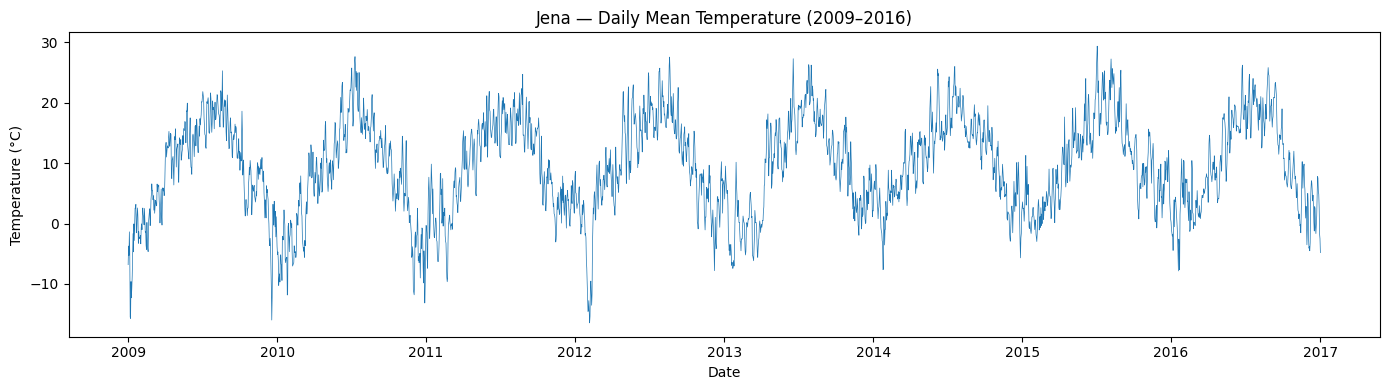

In [5]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(df_daily.index, df_daily["temperature"], linewidth=0.5)
ax.set_title("Jena — Daily Mean Temperature (2009–2016)")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()